In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.colors as mcolors
from datetime import datetime

from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [2]:
    # 대용량 데이터 불러오기 # 약 3초 소요

    from pyarrow import csv

    import time
    start = time.time() 

    df = csv.read_csv('2023_micropem_week6.csv').to_pandas()

    print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

time : 0.2368476390838623


In [3]:
df

,Date,Time,rawneph,Temp,RH,FilterID,hour,time_new,date_time,Name,UPSN,Platfm
0,2023-05-12,11:04:10,13.968,27.7,41.6,KEE1020,11,11:00:00,2023-05-12 11:00:00,노한숙,MTL101002E,O
1,2023-05-12,11:04:20,19.602,NaN,41.0,KEE1020,11,11:00:00,2023-05-12 11:00:00,노한숙,MTL101002E,O
2,2023-05-12,11:04:30,27.823,NaN,42.4,KEE1020,11,11:00:00,2023-05-12 11:00:00,노한숙,MTL101002E,O
3,2023-05-12,11:04:40,30.378,27.9,44.0,KEE1020,11,11:00:00,2023-05-12 11:00:00,노한숙,MTL101002E,O
4,2023-05-12,11:04:50,19.398,NaN,43.3,KEE1020,11,11:00:00,2023-05-12 11:00:00,노한숙,MTL101002E,O
...,...,...,...,...,...,...,...,...,...,...,...,...
456092,2023-05-18,16:24:10,7.579,26.9,56.9,KEE1021,16,16:00:00,2023-05-18 16:00:00,노왕례,UCC320146F,I
456093,2023-05-18,16:24:20,7.554,NaN,57.2,KEE1021,16,16:00:00,2023-05-18 16:00:00,노왕례,UCC320146F,I
456094,2023-05-18,16:24:30,7.675,NaN,55.5,KEE1021,16,16:00:00,2023-05-18 16:00:00,노왕례,UCC320146F,I
456095,2023-05-18,16:25:10,10.069,26.9,57.3,KEE1021,16,16:00:00,2023-05-18 16:00:00,노왕례,UCC320146F,I


In [4]:
weekday = df['date_time'].dt.strftime("%A")
df['weekday'] = weekday

In [5]:
def function(x):
    if x == "Monday":
        return "월요일"
    elif x == "Tuesday":
        return "화요일"
    elif x == "Wednesday":
        return "수요일"
    elif x == "Thursday":
        return "목요일"
    elif x == "Friday":
        return "금요일"
    elif x == "Saturday":
        return "토요일"
    else:
        return "일요일"

df['weekday2']=df["weekday"].apply(function)

In [6]:
# 요일별 pm2.5 평균

df_weekday = df[df["Name"] == "노한숙"].groupby(['weekday2', 'Platfm'])['rawneph'].agg('mean').reset_index()


In [7]:
#목요일 제외
df_weekday = df_weekday[~df_weekday['weekday2'].isin(['목요일'])]

In [8]:
df_pivot = pd.pivot(df_weekday, index = ['weekday2'], columns = 'Platfm', values = 'rawneph').reset_index()
df_pivot = df_pivot.rename(columns = {"I": "실내", "O": "실외", "P": "개인"})

In [9]:
df_pivot

Platfm,weekday2,실내,실외,개인
0,금요일,25.332471,14.775610,30.111649
1,수요일,2.329538,12.357942,NaN
2,월요일,22.720010,19.019406,35.614311
3,일요일,11.082906,14.598524,15.143623
4,토요일,12.883444,21.916116,12.837078
5,화요일,23.471143,21.671325,23.685582


In [10]:
new_order = []
for i in ['금요일', '토요일', '일요일','월요일', '화요일', '수요일']:
    weekday_index = df_pivot[df_pivot['weekday2'] == i].index.tolist()[0]
    new_order.append(weekday_index)

new_order

[0, 4, 3, 2, 5, 1]

In [11]:
df_pivot_reordered = df_pivot.reindex(new_order)

In [12]:
df_pivot_reordered

Platfm,weekday2,실내,실외,개인
0,금요일,25.332471,14.775610,30.111649
4,토요일,12.883444,21.916116,12.837078
3,일요일,11.082906,14.598524,15.143623
2,월요일,22.720010,19.019406,35.614311
5,화요일,23.471143,21.671325,23.685582
1,수요일,2.329538,12.357942,NaN


In [13]:
# Define custom colors for the colormap
custom_colors = ['#fe7f2d', '#fcca46', '#a1c181'] #'#233d4d' '#619b8a'
custom_colors2 = ['#413c58', '#a3c4bc', '#bfd7b5', '#e7efc5', '#f2dda4']

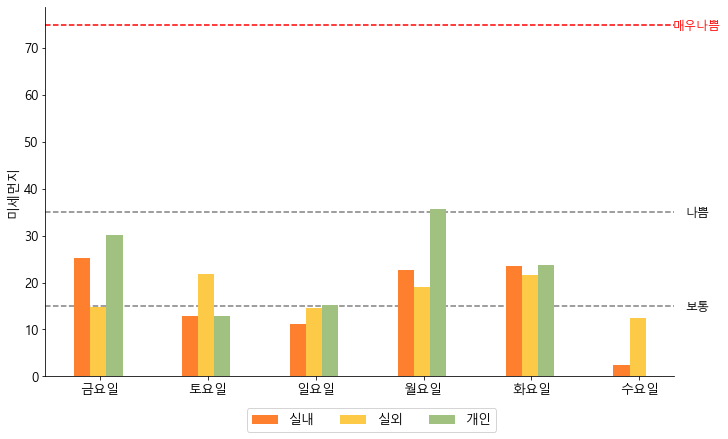

In [17]:
weekday_list = ['금요일', '토요일', '일요일','월요일', '화요일', '수요일']
platfm_rawneph = df_pivot_reordered[['실내', '실외', '개인']]
x = np.arange(len(weekday_list))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(layout='constrained',figsize=(10,6))

for i, (name, values) in enumerate(platfm_rawneph.items()):
    rects = ax.bar(x + i*width, values, width, label= name, color=custom_colors[i])


ax.spines[['right', 'top']].set_visible(False)
ax.axhline(y=15, zorder=0, color='grey', ls='--', lw=1.5)
ax.axhline(y=35, zorder=0, color='grey', ls='--', lw=1.5)
ax.axhline(y=75, zorder=0, color='red', ls='--', lw=1.5)

ax.text(x=5.7, y=14, s='보통', ha='center', fontsize=12)
ax.text(x=5.7, y=34, s='나쁨', ha='center', fontsize=12)
ax.text(x=5.7, y=74, s='매우나쁨', ha='center', fontsize=12, color = 'red')
# bbox=dict(facecolor='white', edgecolor='grey', ls='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('미세먼지', fontsize = 13)
# ax.set_title('요일별 미세먼지 농도', fontsize = 15, fontweight = "bold")
ax.set_xticks(x + width*1.10, weekday_list)
ax.legend(loc=(0.32,-0.15), ncol = 5, fontsize = 13)
ax.tick_params(labelsize=13)
# ax.grid(True, axis = 'y', color='gray', linewidth=0.5, alpha = 0.5)

# plt.savefig('seasonal_with_barlabel.png', bbox_inches = 'tight', facecolor='#ffffff')
plt.show()

In [15]:
# 시간에 따른 미세먼지 농도 line plot (platform별)

df_hour = df[df['Name'] == "노한숙"].groupby(['Platfm', 'hour'])['rawneph'].agg('mean').reset_index()
df_hour

,Platfm,hour,rawneph
0,I,0,11.385364
1,I,1,10.713719
2,I,2,10.998815
3,I,3,10.263942
4,I,4,9.372602
...,...,...,...
67,P,19,18.739313
68,P,20,15.450369
69,P,21,17.980511
70,P,22,17.125946


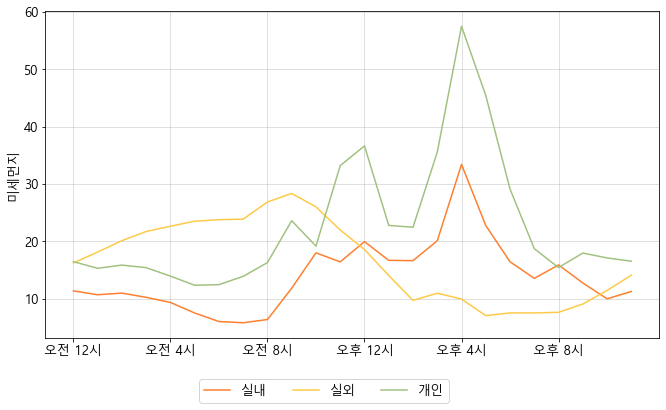

In [21]:
fig, ax = plt.subplots(figsize=(11,6))
custom_colors = ['#fe7f2d', '#fcca46', '#a1c181'] #'#233d4d' '#619b8a'
#ax.spines[['right', 'top']].set_visible(False)
ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['Platfm'] == 'I']['rawneph'], color = custom_colors[0], label = '실내')
ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['Platfm'] == 'O']['rawneph'], color = custom_colors[1], label = '실외')
ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['Platfm'] == 'P']['rawneph'], color = custom_colors[2], label = '개인')

# ax.set_xlabel('시간', fontsize=13)
ax.set_ylabel('미세먼지', fontsize=13)
# ax.set_title('시간별 미세먼지 농도추이', fontsize=15, fontweight = "bold")
ax.legend(loc=(0.25,-0.2), ncol = 4, fontsize = 13)
ax.set_xticks(np.arange(0,24,4))
ax.set_xticklabels(['오전 12시', '오전 4시', '오전 8시', '오후 12시', '오후 4시', '오후 8시'])
ax.tick_params(labelsize=13)

plt.grid(True, alpha = 0.5)
plt.show()